In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Задание 1

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию.

In [ ]:
data = pd.read_csv('Cellphone.csv')

In [ ]:
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
data['Price'].mean()

2215.5962732919256

In [ ]:
data.Price.mode()

,Price
0,1734
1,2744


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
data = data.drop(columns=['Product_id'])

In [ ]:
X = data.drop(columns=['Price'])
y = data['Price']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(Xtrain, ytrain) # обучение модели

pred_test = model.predict(Xtest) # предсказание
rmse = mean_squared_error(ytest, pred_test) ** 0.5
r2 = r2_score(ytest, pred_test)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 147.92055875562536
R2: 0.9614025134850815


Масштабирование и регуляризация

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# масштабирование
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# обучение
lasso = Lasso(alpha=0.1)
lasso.fit(Xtrain_scaled, ytrain)

# коэффициенты модели
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# зануленные признаки
print("Зануленные признаки:", list(lasso_coef[lasso_coef == 0].index))
lasso_coef

Зануленные признаки: []


,0
Sale,-30.869209
weight,-49.767513
resoloution,-90.606922
ppi,153.611445
cpu core,123.878940
cpu freq,76.223780
internal mem,164.624682
ram,163.821943
RearCam,23.053528
Front_Cam,31.729720


In [ ]:
# предсказание и оценка качества модели
ypred_train = lasso.predict(Xtrain_scaled)
ypred_test = lasso.predict(Xtest_scaled)

print(f"R2 train: {r2_score(ytrain,ypred_train)}, R2 test: {r2_score(ytest,ypred_test)}")

R2 train: 0.951600102761604, R2 test: 0.961323488141152


### Задание 2
Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change.

In [ ]:
diet = pd.read_csv('diet_data.csv')

In [ ]:
diet.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [ ]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         150 non-null    object 
 1   Stone        142 non-null    float64
 2   Pounds       142 non-null    float64
 3   Ounces       142 non-null    float64
 4   weight_oz    149 non-null    float64
 5   calories     140 non-null    float64
 6   cals_per_oz  147 non-null    object 
 7   five_donuts  140 non-null    float64
 8   walk         140 non-null    float64
 9   run          140 non-null    float64
 10  wine         140 non-null    float64
 11  prot         140 non-null    float64
 12  weight       140 non-null    float64
 13  change       147 non-null    float64
dtypes: float64(12), object(2)
memory usage: 16.6+ KB


#### Подготовка данных

In [ ]:
# удалю сразу строки с пустыми целевыми данными
diet.dropna(subset=['change'], inplace=True)
diet = diet[diet.change != 0]

In [ ]:
# заменяю даты-объекты на даты
diet.Date = pd.to_datetime(diet.Date)

# затем добавлю отдельную колонку с кол-вом дней от начала диеты
diet['since_start'] = (diet.Date - diet.Date.min()).dt.days
diet.drop('Date', axis=1, inplace=True)

In [ ]:
# калорий на унцию преобразовываю в числа
diet['cals_per_oz'] = pd.to_numeric(diet['cals_per_oz'], errors='coerce')

In [ ]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 143
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stone        134 non-null    float64
 1   Pounds       134 non-null    float64
 2   Ounces       134 non-null    float64
 3   weight_oz    134 non-null    float64
 4   calories     133 non-null    float64
 5   cals_per_oz  134 non-null    float64
 6   five_donuts  133 non-null    float64
 7   walk         133 non-null    float64
 8   run          133 non-null    float64
 9   wine         133 non-null    float64
 10  prot         133 non-null    float64
 11  weight       133 non-null    float64
 12  change       134 non-null    float64
 13  since_start  134 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 15.7 KB


In [ ]:
# пустую строку с calories заменю на медианное значение, так как разброс большой
diet.calories = diet.calories.fillna(diet.calories.median())

In [ ]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 143
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stone        134 non-null    float64
 1   Pounds       134 non-null    float64
 2   Ounces       134 non-null    float64
 3   weight_oz    134 non-null    float64
 4   calories     134 non-null    float64
 5   cals_per_oz  134 non-null    float64
 6   five_donuts  133 non-null    float64
 7   walk         133 non-null    float64
 8   run          133 non-null    float64
 9   wine         133 non-null    float64
 10  prot         133 non-null    float64
 11  weight       133 non-null    float64
 12  change       134 non-null    float64
 13  since_start  134 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 15.7 KB


In [ ]:
# пустые осташиеся five_donuts, walk, run, wine, prot, weight заменяю модой
diet['five_donuts'] = diet['five_donuts'].fillna(diet['five_donuts'].mode()[0])
diet['walk'] = diet['walk'].fillna(diet['walk'].mode()[0])
diet['run'] = diet['run'].fillna(diet['run'].mode()[0])
diet['wine'] = diet['wine'].fillna(diet['wine'].mode()[0])
diet['prot'] = diet['prot'].fillna(diet['prot'].mode()[0])
diet['weight'] = diet['weight'].fillna(diet['weight'].mode()[0])

In [ ]:
diet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 143
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stone        134 non-null    float64
 1   Pounds       134 non-null    float64
 2   Ounces       134 non-null    float64
 3   weight_oz    134 non-null    float64
 4   calories     134 non-null    float64
 5   cals_per_oz  134 non-null    float64
 6   five_donuts  134 non-null    float64
 7   walk         134 non-null    float64
 8   run          134 non-null    float64
 9   wine         134 non-null    float64
 10  prot         134 non-null    float64
 11  weight       134 non-null    float64
 12  change       134 non-null    float64
 13  since_start  134 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 15.7 KB


#### Масштабирование, обучение и регуляризация

In [ ]:
X = diet.drop('change', axis=1)
y = diet.change

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg = LinearRegression().fit(Xtrain, ytrain)

In [ ]:
pred_train = reg.predict(Xtrain)
pred_test = reg.predict(Xtest)

In [ ]:
mean_squared_error(pred_train, ytrain) ** 0.5

21.027210585099635

In [ ]:
mean_squared_error(pred_test, ytest) ** 0.5

20.61301249229532

In [ ]:
diet.change.mean(), diet.change.min(), diet.change.max()

(-20.940298507462686, -2598.0, 102.0)

In [ ]:
change = ytrain[7]
parameters = Xtrain.iloc[7].values
change, parameters
reg.intercept_ + sum(reg.coef_ * parameters), change

(-6.854392498960124, 6.0)

In [ ]:
# масштабирование
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
reg_scaler = LinearRegression().fit(Xtrain, ytrain)

In [ ]:
ypred_train = reg_scaler.predict(Xtrain)
ypred_test = reg_scaler.predict(Xtest)

In [ ]:
np.sqrt(mean_squared_error(ytrain, ypred_train)), np.sqrt(mean_squared_error(ytest, ypred_test))

(21.027210585099684, 20.61301249229538)

In [ ]:
# добавление регуляризации
reg2 = Lasso(alpha=0.5).fit(Xtrain, ytrain)

ypred2 = reg2.predict(Xtest)
print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(reg2.coef_,'\n')

Scores: 0.4401102946199038 427.3962995439767
[ 4.26948028e-01 -0.00000000e+00  9.57339185e-01  2.31320520e+01
 -1.36343747e+03  1.41279532e+03  2.43387493e+00 -3.82842865e+00
 -3.31524672e+00  5.84744422e-01 -0.00000000e+00  1.41215211e+00
 -2.02167787e+00] 



In [ ]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 20, n_alphas)

lasso_cv = LassoCV(alphas=alphas,
                   cv=5, random_state=17)
lasso_cv.fit(X, y)

In [ ]:
reg_21 = Lasso(alpha=lasso_cv.alpha_)
reg_21.fit(Xtrain, ytrain)

ypred2_train = reg_21.predict(Xtrain)
ypred2_test = reg_21.predict(Xtest)

print(f'Score: {r2_score(ytrain, ypred2_train)} - на обучающей выборке, {r2_score(ytest, ypred2_test)} - на тестовой')
# моделька переобучилась

Score: 0.9792037366836112 - на обучающей выборке, 0.3052293653378221 - на тестовой


#### Ridge + одновременная регуляризация

In [ ]:
for a in np.arange(0.1, 5.1, 0.2):
  reg3 = Ridge(alpha=a).fit(Xtrain, ytrain)
  ypred3 = reg3.predict(Xtest)

  print('aplha={}'.format(a))
  print(f'R2: {r2_score(ytest, ypred3)}, MAE: {mean_absolute_error(ytest, ypred3)}')

aplha=0.1
R2: 0.3412103786902696, MAE: 16.307211288130706
aplha=0.30000000000000004
R2: -0.15262921685526631, MAE: 23.36807121065196
aplha=0.5000000000000001
R2: -0.8084641158497605, MAE: 30.080155691228825
aplha=0.7000000000000001
R2: -1.4967949773065787, MAE: 35.40337631465471
aplha=0.9000000000000001
R2: -2.162608236554147, MAE: 39.85013925540638
aplha=1.1000000000000003
R2: -2.783693269481103, MAE: 43.531232333388644
aplha=1.3000000000000003
R2: -3.352805195696159, MAE: 46.640908977487335
aplha=1.5000000000000004
R2: -3.8695803170754406, MAE: 49.28619114251763
aplha=1.7000000000000004
R2: -4.336722286883317, MAE: 51.54626556528625
aplha=1.9000000000000004
R2: -4.758159840975237, MAE: 53.49412693417864
aplha=2.1000000000000005
R2: -5.138151936586666, MAE: 55.18548589700434
aplha=2.3000000000000007
R2: -5.480861461321943, MAE: 56.66359776998462
aplha=2.5000000000000004
R2: -5.790164802130277, MAE: 57.96255811864838
aplha=2.7000000000000006
R2: -6.06958071173788, MAE: 59.1096045696575

In [ ]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas,
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

In [ ]:
ridge_cv.alpha_ # получилось слишком большим

1000000.0

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.0 -1.4666420652046805


In [ ]:
regressor3.coef_ # все занулилось

array([ 0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.])

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
elastic_cv = ElasticNetCV(
    l1_ratio=np.linspace(0.1, 1, 10),
    alphas=np.logspace(-4, 2, 100),
    cv=3
    )

elastic_cv.fit(Xtrain, ytrain)

regressor_elastic = ElasticNet(alpha=elastic_cv.alpha_, l1_ratio=elastic_cv.l1_ratio_)
regressor_elastic.fit(Xtrain, ytrain)

ypred_train = regressor_elastic.predict(Xtrain)
ypred_test = regressor_elastic.predict(Xtest)

In [ ]:
# получилось не лучше чем случайное предсказание, возможно данных слишком мало, либо необходимо данные лучше подготовить
print('Scores:', r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test))

Scores: 0.9268161946324485 -0.03889660420514063


### Задание 3

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно.

In [1]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/02-Regularization%2C%20Normalization/Life%20Expectancy%20Data.csv

--2025-04-20 19:46:39--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/02-Regularization%2C%20Normalization/Life%20Expectancy%20Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333442 (326K) [text/plain]
Saving to: ‘Life Expectancy Data.csv’

Life Expectancy Dat 100%[===================>] 325.63K  1.94MB/s    in 0.2s    

2025-04-20 19:46:40 (1.94 MB/s) - ‘Life Expectancy Data.csv’ saved [333442/333442]



In [47]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Исследование датасета

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [49]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [50]:
data.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [51]:
data.Country.value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


In [52]:
data.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [53]:
data.columns.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [54]:
data.columns = data.columns.str.strip()
data.dropna(subset=['Life expectancy'], inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio                    

In [56]:
data.Status.value_counts()

,count
Status,
Developing,2416
Developed,512


In [57]:
data[data.Country == 'Afghanistan']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Country_encoded'] = le.fit_transform(data['Country'])

In [59]:
data.sample(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded
1325,Japan,2004,Developed,82.1,68.0,3,7.70,6746.281299,NaN,8752,...,8.30,99.0,0.1,37688.72234,127761.0,1.7,1.4,0.866,14.8,82
645,Croatia,2011,Developed,77.0,14.0,0,12.19,1913.356642,97.0,12,...,7.80,96.0,0.1,14539.18421,428622.0,1.6,1.5,0.808,14.5,39
547,Chile,2012,Developing,79.9,84.0,2,6.76,2260.777642,9.0,0,...,7.24,9.0,0.1,15431.92930,1739746.0,0.8,0.8,0.826,15.5,33


In [60]:
data['Status_encoded'] = data['Status'].map({'Developing': 0, 'Developed': 1})

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio                    

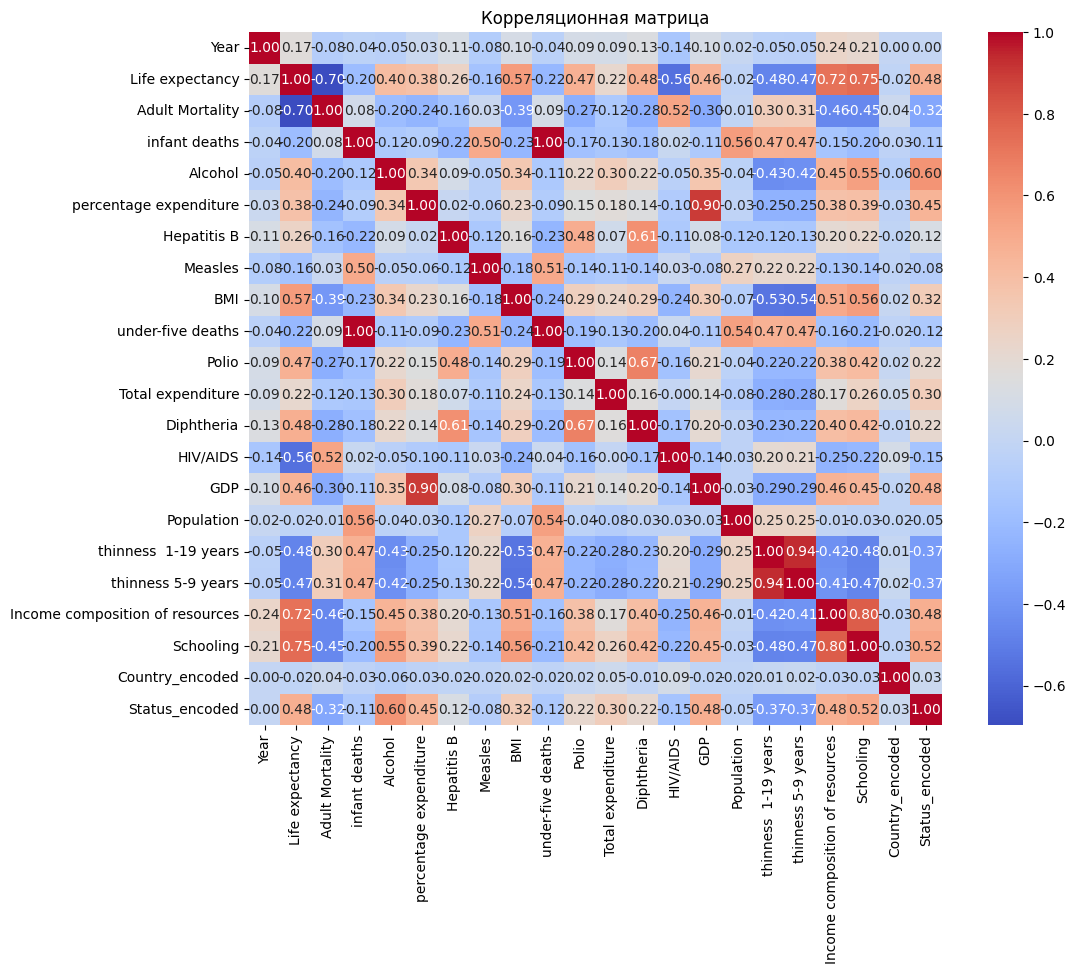

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
correlation = data.corr(numeric_only=True)  # Только числовые признаки
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица")
plt.show()

In [63]:
# удаляю корреляционные по принципу где больше непустых
data_life = data.drop(['infant deaths', 'thinness 5-9 years', 'GDP'], axis=1)

In [64]:
data_life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Alcohol                          2735 non-null   float64
 6   percentage expenditure           2928 non-null   float64
 7   Hepatitis B                      2375 non-null   float64
 8   Measles                          2928 non-null   int64  
 9   BMI                              2896 non-null   float64
 10  under-five deaths                2928 non-null   int64  
 11  Polio                            2909 non-null   float64
 12  Total expenditure        

In [65]:
data[data['Population'].isna()].groupby('Country').size().reset_index(name='Missing Count')

,Country,Missing Count
0,Antigua and Barbuda,16
1,Bahamas,16
2,Bahrain,16
3,Barbados,16
4,Bolivia (Plurinational State of),16
5,Brunei Darussalam,16
6,Congo,16
7,Cuba,16
8,Czechia,16
9,Côte d'Ivoire,16


In [66]:
data[data.Country == 'Antigua and Barbuda']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded,Status_encoded
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,4,0
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9,4,0
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9,4,0
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8,4,0
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,0.1,11929.349910,NaN,3.3,3.3,0.782,14.1,4,0
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1,4,0
70,Antigua and Barbuda,2009,Developing,75.4,14.0,0,7.82,149.358735,98.0,0,...,99.0,0.1,1312.466920,NaN,3.4,3.3,0.788,14.2,4,0
71,Antigua and Barbuda,2008,Developing,75.2,142.0,0,8.27,180.776270,98.0,0,...,99.0,0.1,1473.319230,NaN,3.4,3.3,0.786,14.4,4,0
72,Antigua and Barbuda,2007,Developing,75.0,144.0,0,8.64,257.966531,97.0,0,...,99.0,0.1,14252.294520,NaN,3.4,3.3,0.781,14.5,4,0
73,Antigua and Barbuda,2006,Developing,74.8,145.0,0,8.93,216.314694,99.0,0,...,99.0,0.1,12724.393770,NaN,3.4,3.4,0.773,14.7,4,0


In [67]:
data[data.Country == 'Antigua and Barbuda'].shape[0] # решаю удалить колонку Population, а то потеряю страны

16

In [68]:
data_life.drop(['Country', 'Status', 'Population'], axis=1, inplace=True)

In [69]:
data_life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2928 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   Alcohol                          2735 non-null   float64
 4   percentage expenditure           2928 non-null   float64
 5   Hepatitis B                      2375 non-null   float64
 6   Measles                          2928 non-null   int64  
 7   BMI                              2896 non-null   float64
 8   under-five deaths                2928 non-null   int64  
 9   Polio                            2909 non-null   float64
 10  Total expenditure                2702 non-null   float64
 11  Diphtheria                       2909 non-null   float64
 12  HIV/AIDS                 

In [70]:
data_life['Status_encoded'].fillna(data_life['Status_encoded'].mode()[0], inplace=True)

<ipython-input-70-8d8f0f20a5df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_life['Status_encoded'].fillna(data_life['Status_encoded'].mode()[0], inplace=True)


In [74]:
data_life.fillna(data_life.mean(), inplace=True)

In [75]:
data_life.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2928 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   Alcohol                          2928 non-null   float64
 4   percentage expenditure           2928 non-null   float64
 5   Hepatitis B                      2928 non-null   float64
 6   Measles                          2928 non-null   int64  
 7   BMI                              2928 non-null   float64
 8   under-five deaths                2928 non-null   int64  
 9   Polio                            2928 non-null   float64
 10  Total expenditure                2928 non-null   float64
 11  Diphtheria                       2928 non-null   float64
 12  HIV/AIDS                 

#### Регрессия

In [76]:
X = data_life.drop(columns=['Life expectancy'])
y = data_life['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

In [79]:
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Absolute Error (MAE): 3.0227335746170554
Mean Squared Error (MSE): 16.34486084287986
R2 Score: 0.8110407655545878
